# Which Neighborhood is the Best in Pittsburgh?

## by Peter Ju and Leo Liang

### Introduction

The environment we live in is essential for it influences our health. Living in a place with a good environment protects your physical health and heals your sanity from the damages caused by modern lifestyles and troubles. We would like to know which Pittsburgh neighborhood is the best on an environmental and individual health basis.

### The Metrics

Our metric is the environment and individual health status in different neighborhoods in Pittsburgh. 
- Environment (Air Quality PM 2.5)
- Environment (Illegal Dump Sites)
- Individual Health (Hypertension + Hyperlipidemia) <br>

We will rank every neighborhood by the three datasets and add up their ranks at the end. The neighborhood with the lowest sum of the ranks will be our best neighborhood.

Datasets incorporated in our project includes:
- [Allegheny County Particulate Matter 2.5](https://data.wprdc.org/dataset/particulate-matter-2-5)
<br>This dataset includes data of PM 2.5 measured in Pittsburgh neighborhoods.
- [Allegheny County Illegal Dump Site](https://data.wprdc.org/dataset/allegheny-county-illegal-dump-sites)
<br>This dataset includes data of illegal dump sites and their estimated tons in Pittsburgh neighborhoods.
- [Hypertension + Hyperlipidemia Comorbidity](https://data.wprdc.org/dataset/hypertension-hyperlipidemia-comorbidity)
<br>This dataset includes data of hypertension and hyperlipidemia comorbidity prevalence in Pittsburgh neighborhoods.
- [Pittsburgh Neighborhoods](https://data.wprdc.org/dataset/neighborhoods2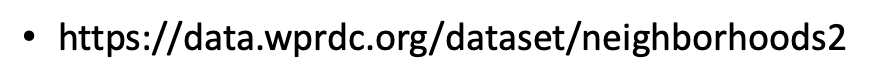)
<br>This dataset shows all neighborhoods and their locations in Pittsburgh.

### Metric: Air Quality by Neighborhood

#### By Peter Ju

Link to the dataset: [Allegheny County Particulate Matter 2.5](https://data.wprdc.org/dataset/particulate-matter-2-5)

Import Python modules

In [1]:
import geopandas as geopd
import pandas as pd

Read data

In [2]:
pm25 = pd.read_csv("Data/pm25.csv")
pm25.head()

,CensusTract,PM25
0,10300,12.264655
1,20100,12.283052
2,20300,12.241216
3,30500,12.234197
4,40200,12.315312


As we can see, the above dataset contains information about the air quality in different places specified by the Census Tract number.

We want to show this on a neighborhood map eventually, so let us load the shapefile by geopandas.

In [3]:
neighborhoods = geopd.read_file("Data/pittsburghpaneighborhoods-/Neighborhoods_.shp")
neighborhoods.head()

,OBJECTID,fid_blockg,statefp10,countyfp10,tractce10,blkgrpce10,geoid10,namelsad10,mtfcc10,funcstat10,...,created_us,created_da,last_edite,last_edi_1,temp,pghdb_sde_,GlobalID,Shape__Are,Shape__Len,geometry
0,1,233,42,003,140500,3,420031405003,Block Group 3,G5030,S,...,SDE,2020-08-14,SDE,2020-08-14,None,7968760.0,a642a6b6-a2a9-48d5-acf2-3e2ce87d4bc0,8.153647e+06,14047.065024,"POLYGON ((-79.90560 40.45522, -79.90553 40.455..."
1,2,203,42,003,140100,3,420031401003,Block Group 3,G5030,S,...,SDE,2020-08-14,SDE,2020-08-14,None,34078712.0,20d4605b-258e-441a-a57e-a28fdabb6d30,3.407739e+07,30347.886823,"POLYGON ((-79.91309 40.43804, -79.91321 40.438..."
2,3,86,42,003,101700,2,420031017002,Block Group 2,G5030,S,...,SDE,2020-08-14,SDE,2020-08-14,None,12751163.0,bf4065e7-c29c-48bd-b529-e7fd99077238,1.275116e+07,14577.441571,"POLYGON ((-79.93457 40.47217, -79.93455 40.472..."
3,4,214,42,003,050900,1,420030509001,Block Group 1,G5030,S,...,SDE,2020-08-14,SDE,2020-08-14,None,4997335.5,fed3fb32-0cd3-4556-aa41-17ee03b4fe41,4.997845e+06,14216.959213,"POLYGON ((-79.96601 40.45520, -79.96596 40.454..."
4,5,173,42,003,300100,5,420033001005,Block Group 5,G5030,S,...,SDE,2020-08-14,SDE,2020-08-14,None,8411048.0,8669d2f0-b886-4519-99d0-bb1015b592b0,8.410563e+06,12003.269761,"POLYGON ((-79.98845 40.41851, -79.98821 40.418..."


We can now create a DataFrame to store everything we have for the air quality index and the neighborhoods shapefile since we will not need every column in the two datasets.

In [4]:
neighborhood_pm25 = pd.DataFrame(columns = ["Neighborhood", "tractce10", "PM25"])
neighborhood_pm25["Neighborhood"] = neighborhoods["hood"]
neighborhood_pm25["tractce10"] = neighborhoods["tractce10"]

neighborhood_pm25[["PM25"]] = neighborhood_pm25[["PM25"]].astype(float)
neighborhood_pm25

,Neighborhood,tractce10,PM25
0,Point Breeze North,140500,NaN
1,Squirrel Hill North,140100,NaN
2,Garfield,101700,NaN
3,Bedford Dwellings,050900,NaN
4,Knoxville,300100,NaN
...,...,...,...
85,Regent Square,141000,NaN
86,Terrace Village,051100,NaN
87,Elliott,562600,NaN
88,South Side Flats,170200,NaN


Now let us iterate through ```pm25``` to fill in the ```NaN```s.

In [5]:
for ignored, row in pm25.iterrows():
    ct = row["CensusTract"]
    for index, each_neighborhood in neighborhood_pm25.iterrows():
        if str(each_neighborhood["tractce10"]) == "None":
            continue
        else:
            if float(str(each_neighborhood["tractce10"])) == float((str(ct))):
                if pd.isna(neighborhood_pm25.at[index, "PM25"]):
                    neighborhood_pm25.at[index, "PM25"] = row["PM25"]
            
neighborhood_pm25

,Neighborhood,tractce10,PM25
0,Point Breeze North,140500,12.280433
1,Squirrel Hill North,140100,12.285337
2,Garfield,101700,12.199422
3,Bedford Dwellings,050900,12.243351
4,Knoxville,300100,12.317734
...,...,...,...
85,Regent Square,141000,12.300740
86,Terrace Village,051100,12.285219
87,Elliott,562600,12.251616
88,South Side Flats,170200,12.298205


We can sort the DataFrame ascendingly since a smaller PM25 value indicates better air quality.

In [6]:
neighborhood_pm25 = neighborhood_pm25.sort_values("PM25", ascending=True)
neighborhood_pm25.head(10)

,Neighborhood,tractce10,PM25
78,Windgap,563000,12.157559
23,Fairywood,563000,12.157559
50,Chartiers City,563000,12.157559
84,Upper Lawrenceville,101100,12.157773
21,Lincoln-Lemington-Belmar,980000,12.158553
71,Stanton Heights,101800,12.159449
76,Summer Hill,261200,12.160112
13,Morningside,101400,12.162134
28,East Carnegie,562800,12.169079
7,Oakwood,562800,12.169079


The below bar graph shows the distribution of the PM 2.5 values among neighborhoods:

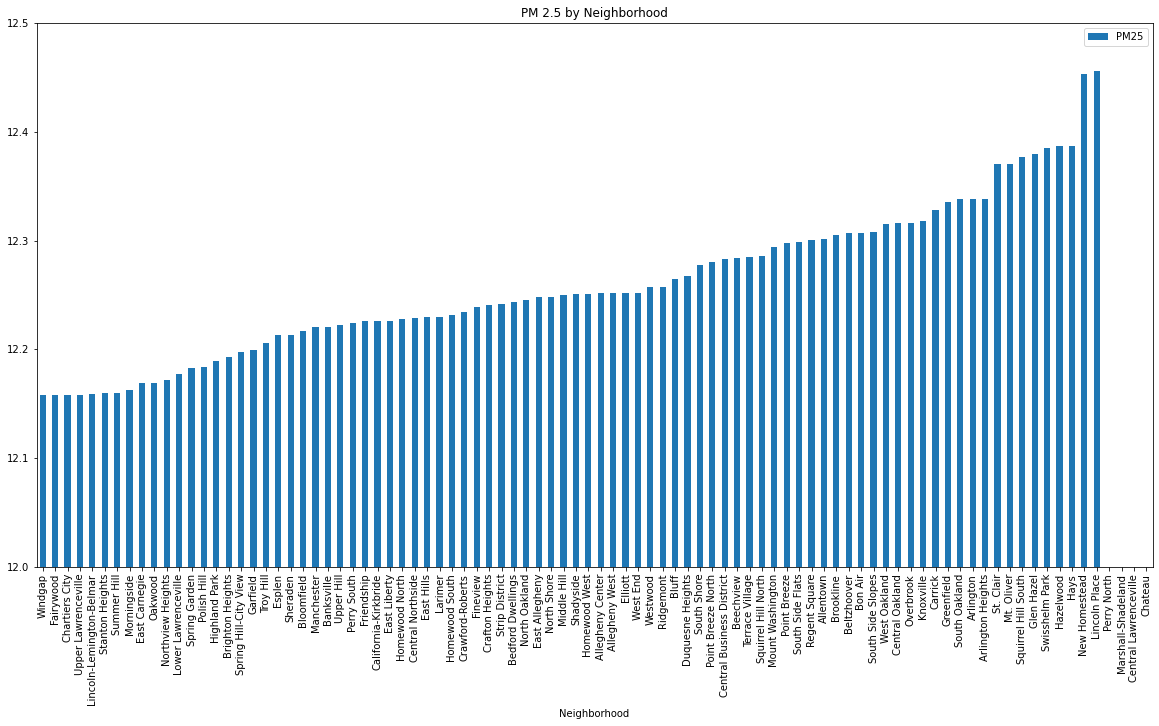

In [7]:
plot = neighborhood_pm25.plot(kind='bar', x="Neighborhood", y="PM25", title="PM 2.5 by Neighborhood", figsize=(20,10)).set_ylim([12,12.5])

Let us make a map to see how the PM2.5 in one neighborhood differs from another.

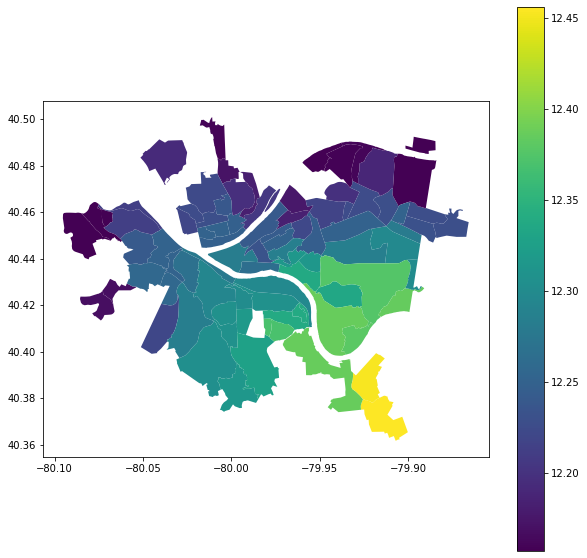

In [8]:
neighborhoods["PM25"] = neighborhood_pm25["PM25"]

neighborhoods.plot(column="PM25", legend=True, figsize=(10,10))

The rank of neighborhoods for this metric will be:

In [9]:
rank = pd.DataFrame(columns=["Neighborhood", "Rank_PM25", "Rank_Dump", "Rank_Hype", "Total"])

rank["Neighborhood"] = neighborhood_pm25["Neighborhood"]
rank["Rank_PM25"] = 0
rank["Rank_Dump"] = 0
rank["Rank_Hype"] = 0
rank["Total"] = 0

counter, hist_counter = 1, 1

value = neighborhood_pm25.iloc[0, 2]

for index, row in neighborhood_pm25.iterrows():
    current_value = row["PM25"]
    
    if current_value == value:
        rank.loc[rank["Neighborhood"] == row["Neighborhood"], "Rank_PM25"] = hist_counter
        counter += 1
    else:
        rank.loc[rank["Neighborhood"] == row["Neighborhood"], "Rank_PM25"] = counter
        hist_counter = counter
        counter += 1
        value = current_value

rank.sort_values(by=["Rank_PM25"]).head(10)

,Neighborhood,Rank_PM25,Rank_Dump,Rank_Hype,Total
78,Windgap,1,0,0,0
23,Fairywood,1,0,0,0
50,Chartiers City,1,0,0,0
84,Upper Lawrenceville,4,0,0,0
21,Lincoln-Lemington-Belmar,5,0,0,0
71,Stanton Heights,6,0,0,0
76,Summer Hill,7,0,0,0
13,Morningside,8,0,0,0
28,East Carnegie,9,0,0,0
7,Oakwood,9,0,0,0


### Illegal Dump Sites by Neighborhood

#### By Peter Ju

Link to the dataset:  [Allegheny County Illegal Dump Sites](hhttps://data.wprdc.org/dataset/allegheny-county-illegal-dump-sites)

Read data

In [10]:
dump = pd.read_csv("Data/dump-site.csv")
dump.head()

,site_name,Status,City,Neighborhood,estimated_tons,location_description,latitude,longitude
0,St. Martin Street,Surveyed,Pittsburgh,Allentown,0.5,NaN,40.42221971,-79.99022525
1,Brosville Street,Surveyed,Pittsburgh,Allentown,3,NaN,40.42370101,-79.98657393
2,McCain Street,Surveyed,Pittsburgh,Allentown,1,NaN,40.42427063,-79.99022675
3,Ceres Way,Surveyed,Pittsburgh,Allentown,0.5,NaN,40.42327242,-79.99248958
4,Eureka Street,Completed,Pittsburgh,Allentown,0.1,NaN,40.42372131,-79.99478912


We want to do data preprocessing to convert certain columns to ```float``` type and eliminate ineffective rows.

In [11]:
dump = dump.loc[dump["estimated_tons"] != "Undetermined"]
dump = dump.loc[dump["estimated_tons"] != "Not Applicable"]
dump = dump[dump["estimated_tons"].notna()]
dump[["estimated_tons"]] = dump[["estimated_tons"]].astype(float)
dump[["latitude"]] = dump[["latitude"]].astype(float)
dump[["longitude"]] = dump[["longitude"]].astype(float)

The shapefile would be the same as the one we previously used. Let us load that in again.

In [12]:
neighborhoods = geopd.read_file("Data/pittsburghpaneighborhoods-/Neighborhoods_.shp")
neighborhoods.head()

,OBJECTID,fid_blockg,statefp10,countyfp10,tractce10,blkgrpce10,geoid10,namelsad10,mtfcc10,funcstat10,...,created_us,created_da,last_edite,last_edi_1,temp,pghdb_sde_,GlobalID,Shape__Are,Shape__Len,geometry
0,1,233,42,003,140500,3,420031405003,Block Group 3,G5030,S,...,SDE,2020-08-14,SDE,2020-08-14,None,7968760.0,a642a6b6-a2a9-48d5-acf2-3e2ce87d4bc0,8.153647e+06,14047.065024,"POLYGON ((-79.90560 40.45522, -79.90553 40.455..."
1,2,203,42,003,140100,3,420031401003,Block Group 3,G5030,S,...,SDE,2020-08-14,SDE,2020-08-14,None,34078712.0,20d4605b-258e-441a-a57e-a28fdabb6d30,3.407739e+07,30347.886823,"POLYGON ((-79.91309 40.43804, -79.91321 40.438..."
2,3,86,42,003,101700,2,420031017002,Block Group 2,G5030,S,...,SDE,2020-08-14,SDE,2020-08-14,None,12751163.0,bf4065e7-c29c-48bd-b529-e7fd99077238,1.275116e+07,14577.441571,"POLYGON ((-79.93457 40.47217, -79.93455 40.472..."
3,4,214,42,003,050900,1,420030509001,Block Group 1,G5030,S,...,SDE,2020-08-14,SDE,2020-08-14,None,4997335.5,fed3fb32-0cd3-4556-aa41-17ee03b4fe41,4.997845e+06,14216.959213,"POLYGON ((-79.96601 40.45520, -79.96596 40.454..."
4,5,173,42,003,300100,5,420033001005,Block Group 5,G5030,S,...,SDE,2020-08-14,SDE,2020-08-14,None,8411048.0,8669d2f0-b886-4519-99d0-bb1015b592b0,8.410563e+06,12003.269761,"POLYGON ((-79.98845 40.41851, -79.98821 40.418..."


We can now create a DataFrame to store everything we want: the dump sites and the name of the neighborhoods, which is what we use in this scenario to assign dump amount to which neighborhood it is in.

In [13]:
neighborhood_dump = pd.DataFrame(columns = ["Neighborhood", "Amount"])
neighborhood_dump["Neighborhood"] = neighborhoods["hood"]

neighborhood_dump[["Amount"]] = 0
neighborhood_dump

,Neighborhood,Amount
0,Point Breeze North,0
1,Squirrel Hill North,0
2,Garfield,0
3,Bedford Dwellings,0
4,Knoxville,0
...,...,...
85,Regent Square,0
86,Terrace Village,0
87,Elliott,0
88,South Side Flats,0


Now iterate through the dataset:

In [14]:
for ignored, row in dump.iterrows():
    
    for index, neighborhood in neighborhood_dump.iterrows():
        if neighborhood["Neighborhood"] == row["Neighborhood"]:
            if neighborhood_dump.at[index, "Amount"] == 0:
                neighborhood_dump.at[index, "Amount"] = row["estimated_tons"]
            else:
                neighborhood_dump.at[index, "Amount"] = neighborhood_dump.at[index, "Amount"] + row["estimated_tons"]

neighborhood_dump

,Neighborhood,Amount
0,Point Breeze North,0.3
1,Squirrel Hill North,0.0
2,Garfield,19.4
3,Bedford Dwellings,1.0
4,Knoxville,9.5
...,...,...
85,Regent Square,0.0
86,Terrace Village,2.5
87,Elliott,7.3
88,South Side Flats,0.0


We can sort the DataFrame ascendingly since a smaller value indicates that the neighborhood has less illegal dump sites.

In [15]:
neighborhood_dump = neighborhood_dump.sort_values("Amount", ascending=True)
neighborhood_dump.head(20)

,Neighborhood,Amount
44,East Allegheny,0.0
34,Manchester,0.0
35,Marshall-Shadeland,0.0
41,Friendship,0.0
43,Central Business District,0.0
88,South Side Flats,0.0
45,Allegheny Center,0.0
48,South Side Slopes,0.0
19,Lower Lawrenceville,0.0
18,Arlington Heights,0.0


This does not give us much insight. So let us look at the rows at the end.

In [16]:
neighborhood_dump.tail(20)

,Neighborhood,Amount
67,Mt. Oliver,11.3
5,Homewood South,12.9
58,Esplen,15.0
20,Larimer,16.9
77,West Oakland,17.3
49,Arlington,17.5
55,East Hills,17.8
9,Duquesne Heights,19.0
2,Garfield,19.4
37,New Homestead,20.0


Below is a bargraph of the data we have.

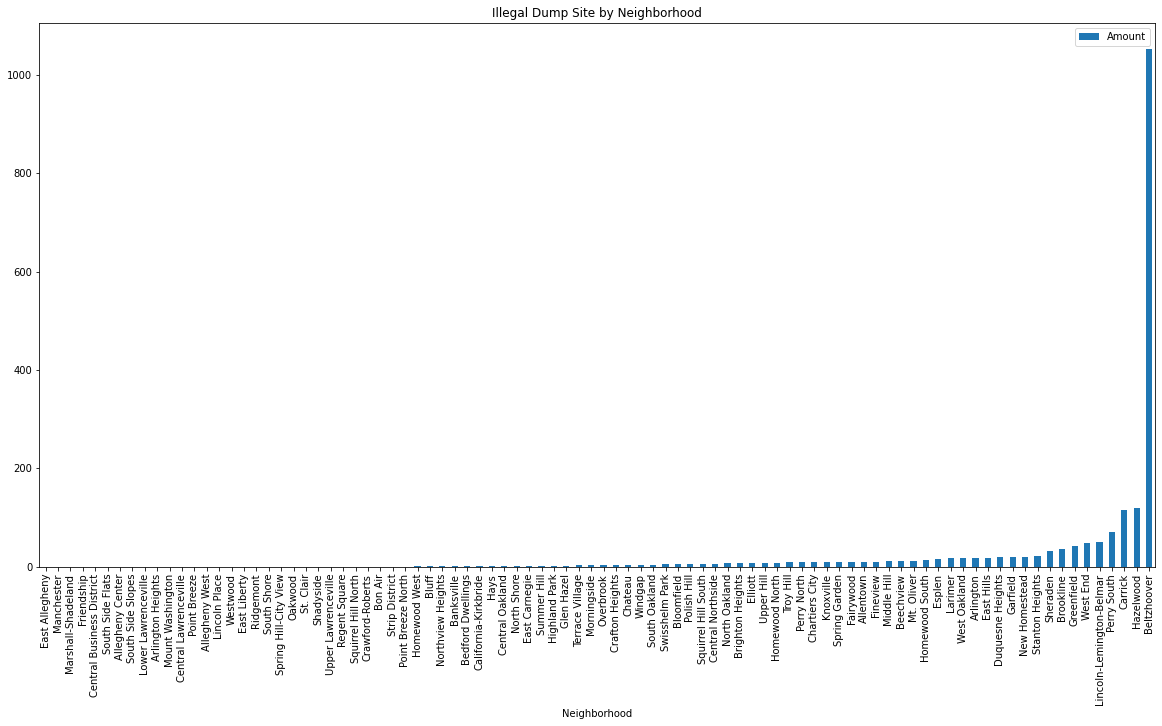

In [17]:
plot = neighborhood_dump.plot(kind='bar', x="Neighborhood", y="Amount", title="Illegal Dump Site by Neighborhood", figsize=(20,10))

Beltzhoover has a very interesting amount here. To put that in a map:

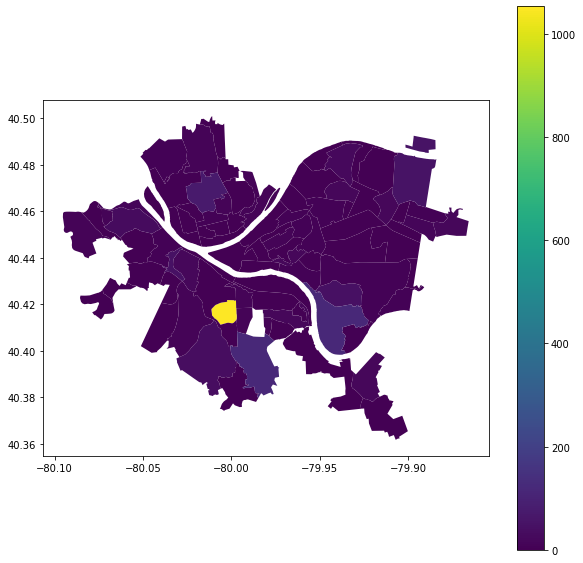

In [18]:
neighborhoods["Amount"] = neighborhood_dump["Amount"]

neighborhoods.plot(column="Amount", legend=True, figsize=(10,10))

The rank of neighborhoods for this metric will be:

In [19]:
counter, hist_counter = 1, 1

value = neighborhood_dump.iloc[0, 1]

for index, row in neighborhood_dump.iterrows():
    current_value = row["Amount"]
    
    if current_value == value:
        rank.loc[rank["Neighborhood"] == row["Neighborhood"], "Rank_Dump"] = hist_counter
        counter += 1
    else:
        rank.loc[rank["Neighborhood"] == row["Neighborhood"], "Rank_Dump"] = counter
        hist_counter = counter
        counter += 1
        value = current_value
    
rank.sort_values(by=["Rank_Dump"])

,Neighborhood,Rank_PM25,Rank_Dump,Rank_Hype,Total
32,Allegheny West,46,1,0,0
43,Central Business District,56,1,0,0
41,Friendship,27,1,0,0
54,Mount Washington,60,1,0,0
59,Point Breeze,61,1,0,0
...,...,...,...,...,...
21,Lincoln-Lemington-Belmar,5,86,0,0
83,Perry South,26,87,0,0
51,Carrick,73,88,0,0
60,Hazelwood,83,89,0,0


### Hypertension By Neighborhoods
#### by Leo Liang

#### We first start by importing the necessary pandas for our datasets,
##### then read in our first file: the dataset on hypertension and hyperlipidemia

In [20]:
import geopandas as gpd
import pandas as pd

hyper_data = gpd.read_file("Data/hypertension_hyperlipidemia_all.csv")

#insert mickey mouse secret tool used for later here
hyper_data

,CT,LTPAD,LTPAN,LTWAD,LTWAN,LTMAD,LTMAN,geometry
0,10300,422,28,197,13,225,15,None
1,20100,2610,175,1242,73,1368,102,None
2,20300,354,38,175,12,179,26,None
3,30500,859,147,553,103,306,44,None
4,40200,388,44,233,29,155,15,None
...,...,...,...,...,...,...,...,...
385,564400,2797,630,1529,333,1268,297,None
386,564500,806,146,440,78,366,68,None
387,980000,4,1,3,1,1,0,None
388,980100,7,0,6,0,1,0,None


#### The column names don't really tell us anything, so either we trust my description of each column (totaly reliable :]) or we can rely on the data dictionary for this data set.

In [21]:
diction = pd.read_csv("Data/hypertension-data-dictionary.csv")
diction

,column,type,label,description
0,CT,text,NaN,Census Tract\r\n
1,LTPAD,text,NaN,"Total number of members, who are Allegheny Cou..."
2,LTPAN,text,NaN,Total number of members who met the denominato...
3,LTWAD,text,NaN,"Total number of women members, who are Alleghe..."
4,LTWAN,text,NaN,Total number of women members who met the deno...
5,LTMAD,text,NaN,"Total number of male members, who are Alleghen..."
6,LTMAN,text,NaN,Total number of male members who met the denom...


#### Damn word cut offs...

In [22]:
i = 0
for d in diction["description"]:
    print(diction.loc[i, "column"]+":", d)
    i+=1

CT: Census Tract

LTPAD: Total number of members, who are Allegheny County residents and who were effectively enrolled for at least 90 continuous days during the 2015 calendar year (Jan 1 - Dec 31).

LTPAN: Total number of members who met the denominator criteria, who are diagnosed with Hypertension & diagnosed with Hyperlipidemia.

LTWAD: Total number of women members, who are Allegheny County residents and who were effectively enrolled for at least 90 continuous days during the 2015 calendar year (Jan 1 - Dec 31).

LTWAN: Total number of women members who met the denominator criteria, who are diagnosed with Hypertension & diagnosed with Hyperlipidemia.

LTMAD: Total number of male members, who are Allegheny County residents and who were effectively enrolled for at least 90 continuous days during the 2015 calendar year (Jan 1 - Dec 31).

LTMAN: Total number of male members who met the denominator criteria, who are diagnosed with Hypertension & diagnosed with Hyperlipidemia.



#### From this, we can see that *LTPAD* is the total number of people with within this research's population, whereas *LTPAN* is the total number of people diagnosed with Hypertension and Hyperlipidemia.
  
### Now, lets start plotting

#### First, we import a file containing different census tracks and the respective neighborhood it maps to:

In [23]:
mapdata = gpd.read_file("Data/pittsburghpaneighborhoods-/Neighborhoods_.shp")
mapdata

,OBJECTID,fid_blockg,statefp10,countyfp10,tractce10,blkgrpce10,geoid10,namelsad10,mtfcc10,funcstat10,...,created_us,created_da,last_edite,last_edi_1,temp,pghdb_sde_,GlobalID,Shape__Are,Shape__Len,geometry
0,1,233,42,003,140500,3,420031405003,Block Group 3,G5030,S,...,SDE,2020-08-14,SDE,2020-08-14,None,7968760.0,a642a6b6-a2a9-48d5-acf2-3e2ce87d4bc0,8.153647e+06,14047.065024,"POLYGON ((-79.90560 40.45522, -79.90553 40.455..."
1,2,203,42,003,140100,3,420031401003,Block Group 3,G5030,S,...,SDE,2020-08-14,SDE,2020-08-14,None,34078712.0,20d4605b-258e-441a-a57e-a28fdabb6d30,3.407739e+07,30347.886823,"POLYGON ((-79.91309 40.43804, -79.91321 40.438..."
2,3,86,42,003,101700,2,420031017002,Block Group 2,G5030,S,...,SDE,2020-08-14,SDE,2020-08-14,None,12751163.0,bf4065e7-c29c-48bd-b529-e7fd99077238,1.275116e+07,14577.441571,"POLYGON ((-79.93457 40.47217, -79.93455 40.472..."
3,4,214,42,003,050900,1,420030509001,Block Group 1,G5030,S,...,SDE,2020-08-14,SDE,2020-08-14,None,4997335.5,fed3fb32-0cd3-4556-aa41-17ee03b4fe41,4.997845e+06,14216.959213,"POLYGON ((-79.96601 40.45520, -79.96596 40.454..."
4,5,173,42,003,300100,5,420033001005,Block Group 5,G5030,S,...,SDE,2020-08-14,SDE,2020-08-14,None,8411048.0,8669d2f0-b886-4519-99d0-bb1015b592b0,8.410563e+06,12003.269761,"POLYGON ((-79.98845 40.41851, -79.98821 40.418..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,86,215,42,003,141000,1,420031410001,Block Group 1,G5030,S,...,SDE,2020-08-14,SDE,2020-08-14,None,5362860.0,93ce438e-e3ec-410d-a7fd-619646e25dc3,5.362506e+06,16007.508980,"POLYGON ((-79.89709 40.42765, -79.89661 40.427..."
86,87,211,42,003,051100,1,420030511001,Block Group 1,G5030,S,...,SDE,2020-08-14,SDE,2020-08-14,None,9529806.0,2858633a-175e-459b-a4c9-9aac92bfe033,9.519745e+06,19569.102832,"POLYGON ((-79.95848 40.44846, -79.95849 40.448..."
87,88,153,42,003,562600,2,420035626002,Block Group 2,G5030,S,...,SDE,2020-08-14,SDE,2020-08-14,None,16904768.0,fbc3ab11-0429-476e-80fd-700f969b204a,1.690646e+07,21634.558817,"POLYGON ((-80.02795 40.44463, -80.02806 40.444..."
88,89,16,42,003,170200,1,420031702001,Block Group 1,G5030,S,...,SDE,2020-08-14,SDE,2020-08-14,None,26083320.0,39308990-70d5-4da6-b2a0-a5510f18e9b9,2.608218e+07,34676.151320,"POLYGON ((-79.97726 40.43272, -79.97725 40.432..."


#### Now, trust me this time that there is a neighborhoods column because text cut off sucks sometimes :P

#### We then make a Dataframe containting the cenus tracts to their respective neighborhoods

In [24]:
neighborhoods = pd.DataFrame(columns = ["CT", "Neighborhoods", "Condition Average"])
neighborhoods["CT"] = mapdata["tractce10"]
neighborhoods["Neighborhoods"] = mapdata["hood"]

neighborhoods

,CT,Neighborhoods,Condition Average
0,140500,Point Breeze North,NaN
1,140100,Squirrel Hill North,NaN
2,101700,Garfield,NaN
3,050900,Bedford Dwellings,NaN
4,300100,Knoxville,NaN
...,...,...,...
85,141000,Regent Square,NaN
86,051100,Terrace Village,NaN
87,562600,Elliott,NaN
88,170200,South Side Flats,NaN


#### Now that we have this table of, all thats left is to populate it with the neighborhood's statistics for hypertension and hyperlipidemia

In [25]:
hyper = hyper_data.set_index("CT")
neigh = neighborhoods.set_index("CT")

for i, row in hyper.iterrows():
    for j, row2 in neigh.iterrows():
        if i == j:
            if float(row["LTPAD"]) < 50:          #elminates neighborhoods with less than 50 total samples
                continue
            row2["Condition Average"] = float(row["LTPAN"])/float(row["LTPAD"])
            break
neigh

,Neighborhoods,Condition Average
CT,,
140500,Point Breeze North,0.121212
140100,Squirrel Hill North,0.099307
101700,Garfield,0.112782
050900,Bedford Dwellings,NaN
300100,Knoxville,0.13883
...,...,...
141000,Regent Square,0.1
051100,Terrace Village,NaN
562600,Elliott,NaN


#### Data for some neighborhoods are missing due to the research csv file not having data on some neighborhoods

In [26]:
neigh = neigh.sort_values("Condition Average", ascending=True)
neigh

,Neighborhoods,Condition Average
CT,,
260900,Northview Heights,0.034261
110200,Highland Park,0.08985
250300,Central Northside,0.093333
101100,Upper Lawrenceville,0.094866
140100,Squirrel Hill North,0.099307
...,...,...
040200,West Oakland,NaN
563000,Windgap,NaN
020300,Strip District,NaN


#### Now we can plot the data as a bar graph to visualize it

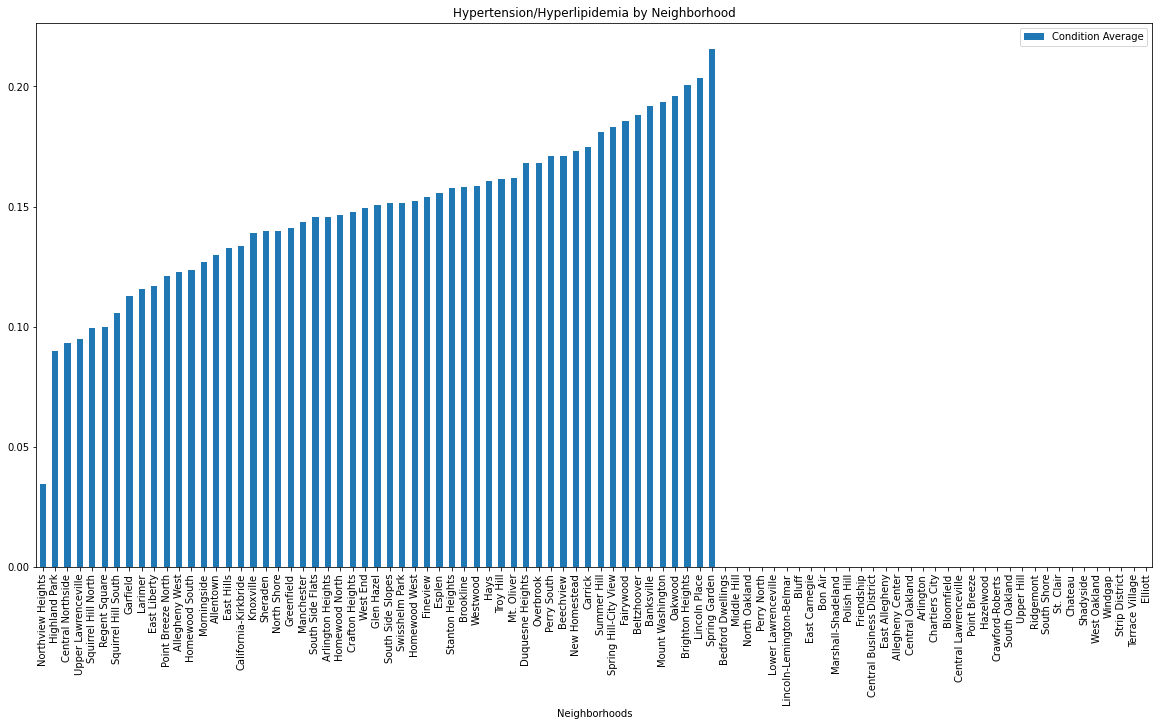

In [27]:
plot = neigh.plot(kind='bar', x="Neighborhoods", y="Condition Average", title="Hypertension/Hyperlipidemia by Neighborhood", figsize=(20,10))

#### The neighborhoods with the lowest percentage of people afflicted with hypertension and hyperlipidemia are towards the left side  

#### Now lets map the data to visualize which region is the best

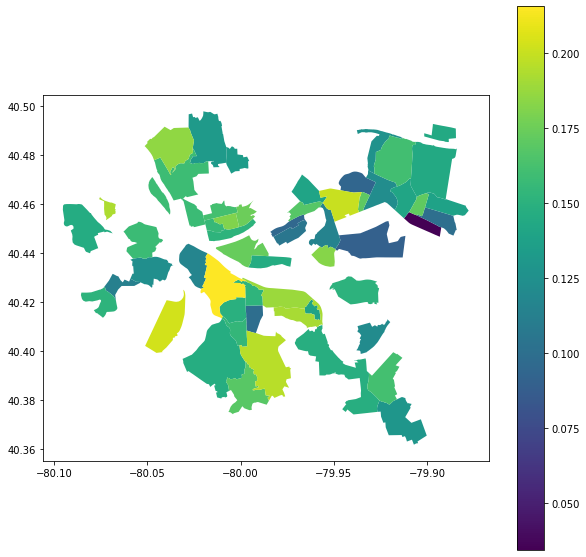

In [28]:
neigh[["Condition Average"]] = neigh[["Condition Average"]].astype(float)

neigh = neigh.reset_index()
mapdata["Condition Average"] = neigh["Condition Average"]

mapdata.plot(column="Condition Average", legend=True, figsize=(10,10))

The rank of neighborhoods for this metric will be:

In [29]:
counter, hist_counter = 1, 1

value = neigh.iloc[0, 1]

for index, row in neigh.iterrows():
    current_value = row["Condition Average"]
    
    if current_value == value:
        rank.loc[rank["Neighborhood"] == row["Neighborhoods"], "Rank_Hype"] = hist_counter
        counter += 1
    else:
        rank.loc[rank["Neighborhood"] == row["Neighborhoods"], "Rank_Hype"] = counter
        hist_counter = counter
        counter += 1
        value = current_value
    
rank.sort_values(by=["Rank_Hype"])

,Neighborhood,Rank_PM25,Rank_Dump,Rank_Hype,Total
16,Northview Heights,11,32,1,0
36,Highland Park,15,42,2,0
38,Central Northside,31,53,3,0
84,Upper Lawrenceville,4,1,4,0
1,Squirrel Hill North,59,1,5,0
...,...,...,...,...,...
77,West Oakland,69,75,86,0
78,Windgap,1,48,87,0
81,Strip District,38,29,88,0
86,Terrace Village,58,44,89,0


#### It seems that the Northeast region of Pittsburgh may have the lowest rate of hypertension and hyperlipidemia!

### Best Neighborhood

To find out which neighborhood is the best, we just add up the rank number in three metrics. The best neighborhood is the one with the least sum amongst all.

In [30]:
for index, row in rank.iterrows():
    rank.at[index, "Total"] = row["Rank_PM25"] + row["Rank_Dump"] + row["Rank_Hype"]
    
rank.sort_values(by=["Total"]).head(10)

,Neighborhood,Rank_PM25,Rank_Dump,Rank_Hype,Total
84,Upper Lawrenceville,4,1,4,9
11,East Liberty,29,1,10,40
16,Northview Heights,11,32,1,44
34,Manchester,23,1,22,46
36,Highland Park,15,42,2,59
32,Allegheny West,46,1,12,59
7,Oakwood,9,1,52,62
69,Spring Hill-City View,17,1,47,65
1,Squirrel Hill North,59,1,5,65
13,Morningside,8,45,14,67


And the winner goes to Upper Lawrenceville!

Putting the ranks on a map:

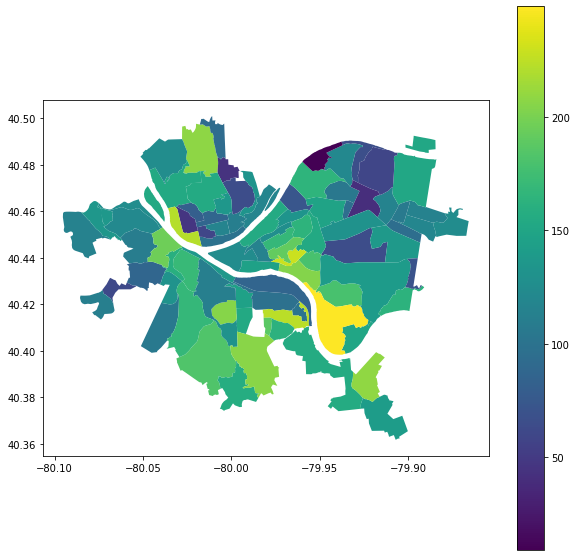

In [31]:
neighborhoods = geopd.read_file("Data/pittsburghpaneighborhoods-/Neighborhoods_.shp")

neighborhoods["Rank"] = 0

for index, row in rank.iterrows():
    neighborhoods.loc[neighborhoods["hood"] == row["Neighborhood"], "Rank"] = row["Total"]

neighborhoods.plot(column="Rank", legend=True, figsize=(10,10))

### Conclusion

**Peter**: It is kind of suprising to see Upper Lawrenceville is having a total rank this low compared to its opponents. To be honest, I am not really familiar with that many neighborhoods inside Pittsburgh since I have not been very long here. However, to a certain aspect, the neighborhood with a good environment often times make people healthier and happier living there. It seems that smaller aspects of environments somehow correlates with each other - that is, say, if a neighborhood has better air quality, then it might also be cleaner than the other neighborhoods.

**Leo**: I haven't really explored much of Pittsburgh outside of Oakland and a few other places, so my hypothesized winner was decided with complete familiority bias (North O). Personally I think this data driven approach may correlate with some aspects of a neighborhood such as sick population or general wealth which are factors in whether a neighborhood is "good" or not. However, This approach may also miss important things that make a neighborhood great such as culture or opportunities.